Import Libraries

In [29]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

SVM Wrapper

In [30]:
class svm_wrapper():

  def fit_svm(self,X,y,kernel = ''):
    if len(kernel) == 0:
      self.svc = svm.SVC()
    else:
      self.svc = svm.SVC(kernel = kernel)
    
    self.svc.fit(X, y)
  
  def predict(self,X):
    return self.svc.predict(X)
  
  def given_decision_boundary(self):
    return self.svc.support_vectors_

  def calculate_accuracy(self,X,y):
    Y_pred = self.predict(X)
    return accuracy_score(y,Y_pred)
  
  

Data Generator

In [31]:
from math import sin,cos,sqrt
class data_generator():

  def generate_data_1(self):
    X = np.zeros((10000,4))
    y = np.zeros(10000)
    for i in range(10000):
      X[i,0] = cos(i/100)*i/10000
      X[i,1] = sin(i/100)*cos(i/50)*i/10000
      X[i,2] = sin(i/100)*sin(i/50)*cos(3*i/100)*i/10000
      X[i,3] = sin(i/100)*sin(i/50)*sin(3*i/100)*i/10000
      y[i] = np.sign(((i+0.001)/100)%3.1416 - 1.5708)
    return X,y

  def find_taichi_class(self,n,*varargs):
    if n==2:
      x,y = varargs[0],varargs[1]
      if y<0:
          return 1-self.find_taichi_class(2,-x,-y)
      d = np.sqrt(x*x+(y-0.5)**2)
      if d>0.5:
          return 0 if x<0 else 1
      else:
          return 0 if d<0.2 else 1
    else:
      t = varargs[0]
      newargs = [sqrt(1.01-t*t)*x for x in varargs[1:]]
      return self.find_taichi_class(n-1,*newargs)

  def generate_data_2(self,n=10000):
    X = np.random.random((n,4))*2-1
    y = np.zeros(n)
    for i in range(n):
      y[i] = self.find_taichi_class(4,X[i,0],X[i,1],X[i,2],X[i,3])
    
    return X,y

  def generate_data_3(self):
    X = np.zeros((10000,4))
    y = np.zeros(10000)
    for i in range(10000):
      X[i,3] = i/5000-1
      X[i,2] = sin(i*3.14159/5000)
      X[i,1] = 0.001 * np.random.randn()
      X[i,0] = 0.001 * np.random.randn()
      y[i] = np.sign(((i+0.001)/500)%3.1416 - 1.5708)

    return X,y

  def generate_dataset(self,n):
    if n==0:
      return self.generate_data_1()
    elif n==1:
      return self.generate_data_2()
    elif n==2:
      return self.generate_data_3()

# **Dataset 1**

---



Text(0.5, 1.0, 'y-z')

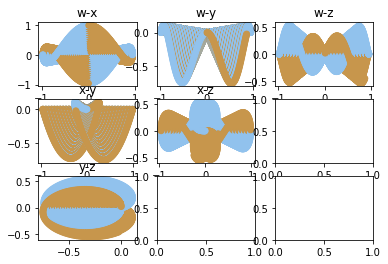

In [32]:
import matplotlib.pyplot as plt
D = data_generator()
X,y = D.generate_data_1()
colors = ["#c7964c" if x == 1 else "#91c2ed" for x in y]
fig, axs = plt.subplots(3, 3)
axs[0, 0].scatter(X[:,0], X[:,1],c=colors)
axs[0, 0].set_title('w-x')
axs[0, 1].scatter(X[:,0], X[:,2],c=colors)
axs[0, 1].set_title('w-y')
axs[0, 2].scatter(X[:,0], X[:,3],c=colors)
axs[0, 2].set_title('w-z')
axs[1, 0].scatter(X[:,1], X[:,2],c=colors)
axs[1, 0].set_title('x-y')
axs[1, 1].scatter(X[:,1], X[:,3],c=colors)
axs[1, 1].set_title('x-z')
axs[2, 0].scatter(X[:,2], X[:,3],c=colors)
axs[2, 0].set_title('y-z')

# **Dataset 2**

---



Text(0.5, 1.0, 'y-z')

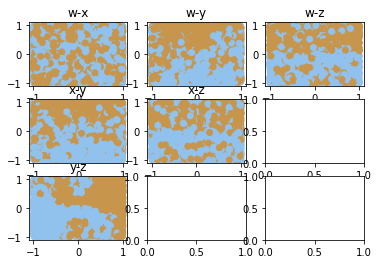

In [33]:

X,y = D.generate_data_2(10000)
colors = ["#c7964c" if x == 1 else "#91c2ed" for x in y]
fig, axs = plt.subplots(3, 3)
axs[0, 0].scatter(X[:,0], X[:,1],c=colors)
axs[0, 0].set_title('w-x')
axs[0, 1].scatter(X[:,0], X[:,2],c=colors)
axs[0, 1].set_title('w-y')
axs[0, 2].scatter(X[:,0], X[:,3],c=colors)
axs[0, 2].set_title('w-z')
axs[1, 0].scatter(X[:,1], X[:,2],c=colors)
axs[1, 0].set_title('x-y')
axs[1, 1].scatter(X[:,1], X[:,3],c=colors)
axs[1, 1].set_title('x-z')
axs[2, 0].scatter(X[:,2], X[:,3],c=colors)
axs[2, 0].set_title('y-z')

# **Dataset 3**

Text(0.5, 1.0, 'y-z')

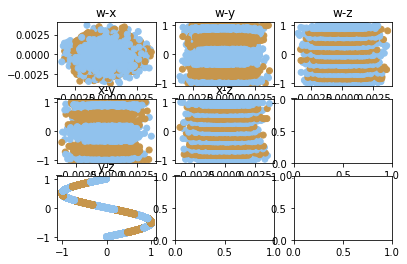

In [34]:
X,y = D.generate_data_3()
colors = ["#c7964c" if x == 1 else "#91c2ed" for x in y]
fig, axs = plt.subplots(3, 3)
axs[0, 0].scatter(X[:,0], X[:,1],c=colors)
axs[0, 0].set_title('w-x')
axs[0, 1].scatter(X[:,0], X[:,2],c=colors)
axs[0, 1].set_title('w-y')
axs[0, 2].scatter(X[:,0], X[:,3],c=colors)
axs[0, 2].set_title('w-z')
axs[1, 0].scatter(X[:,1], X[:,2],c=colors)
axs[1, 0].set_title('x-y')
axs[1, 1].scatter(X[:,1], X[:,3],c=colors)
axs[1, 1].set_title('x-z')
axs[2, 0].scatter(X[:,2], X[:,3],c=colors)
axs[2, 0].set_title('y-z')

# PCA

**KernelPCAE -> With Kernel Trick**

In [35]:
import pdb

class KernelPCA():
  
  def __init__(self):
    return
  
  def get_corresponding_kernel(self,X,default_kernel = 'identity',
                               polynomial_degree = 1,\
                               sigma=1,\
                               small_k=1,theta=1):
    if default_kernel == 'identity':
      return X
    elif default_kernel == 'polynomial':
      return (np.dot(X.T,X) + 1) ** polynomial_degree
    elif default_kernel == 'rbf':
      return np.exp(-euclidean_distances(X.T,X.T) / (2 * (sigma ** 2)))
    elif default_kernel == 'sigmoid':
      return np.tanh(small_k * np.dot(X.T,X) - theta)
    
  def centralize_kernel(self,K):
    assert K.shape[0] == K.shape[1]
    J = np.identity(K.shape[0]) - (1/K.shape[0]) * np.ones((K.shape[0],K.shape[0]))
    #return np.dot(np.dot(J,K)KernelPCAE,J.T)
    return np.dot(np.dot(J,K),J.T)

  def run_kernel_pca(self,X,default_kernel = 'identity',
                               polynomial_degree = 1,\
                               sigma=1,\
                               small_k=1,theta=1):
    # X -> (D,N) D is features, N Samples

    # 1. -> Calculate Kernel
    K = self.get_corresponding_kernel(X,default_kernel = default_kernel,\
                                      polynomial_degree = polynomial_degree,\
                                      sigma = sigma, small_k = small_k,\
                                      theta = theta)

    # 2. -> Centralize Kernel
    K_centralized = self.centralize_kernel(K)

    # 3. -> find eigen vectors and eigen values
    V,Q = np.linalg.eigh(K_centralized)

    self.V = V
    self.Q = Q
    self.K = K_centralized

    temp_mat = np.zeros((X.shape[1],1))
    for col in range(X.shape[1]):
      temp_mat += self.get_corresponding_transformation(X,X[:,col:col+1],default_kernel,\
                                                 polynomial_degree = polynomial_degree,\
                                                 sigma=sigma,small_k=small_k,theta=theta).reshape(-1,1)
    self.temp_mat = temp_mat
  
  def get_corresponding_transformation(self,X,xi,default_kernel = 'identity',\
                                        polynomial_degree = 1,sigma=1,\
                               small_k=1,theta=1):
    if default_kernel == 'identity':
      return xi
    elif default_kernel == 'polynomial':
      return (np.dot(X.T,xi) + 1) ** polynomial_degree
    elif default_kernel == 'rbf':
      return np.exp(-euclidean_distances(X.T,xi.T) / (2 * (sigma ** 2)))
    elif default_kernel == 'sigmoid':
      return np.tanh(small_k * np.dot(X.T,xi) - theta)
  
  def value_of_l_exlpains(self,choose_l_percent):

    l = 0
    captured_percent = 0
    total = np.sum(self.V)

    for i in range(len(self.V)-1,-1,-1):
      captured_percent += self.V[i]/total
      l += 1
      if captured_percent >= choose_l_percent:
        break
    
    return l
  
  def get_transformation(self,l=2,choose_l_percent = -1):
    assert len(self.V) != 0 and len(self.Q) != 0 and len(self.K) != 0


    if choose_l_percent != -1:
      l = self.value_of_l_exlpains(choose_l_percent)

    V,Q = self.V[-l:],self.Q[:,-l:]

    delta_inv = np.linalg.inv(np.sqrt(np.diag(V)))

    return np.dot(delta_inv,np.dot(Q.T,self.K))
  
  def get_transformation_out_of_sample(self,X,xi,default_kernel = 'identity',\
                                        polynomial_degree = 1,sigma=1,\
                               small_k=1,theta=1,l=2,choose_l_percent = -1):
    assert len(self.V) != 0 and len(self.Q) != 0 and len(self.K) != 0

    if choose_l_percent != -1:
      l = self.value_of_l_exlpains(choose_l_percent)

    V,Q = self.V[-l:],self.Q[:,-l:]

    delta_inv = np.linalg.inv(np.sqrt(np.diag(V)))

    W_u = np.dot(Q,delta_inv.T)

    K_x = self.get_corresponding_transformation(X,xi,default_kernel,\
                                                 polynomial_degree = polynomial_degree,\
                                                 sigma=sigma,small_k=small_k,theta=theta).reshape(-1,1)
    
    K_x = K_x - self.temp_mat

    return np.dot(W_u.T,K_x) 





In [36]:
import time
import pandas as pd

def timed_pipeline(dataset=0,pca_kernel=0,svm_kernel=0,num_principal_components=16,polynomial_degree=2,sigma=1,small_k=1,theta=1):

  global df

  df_dict = {}

  D = data_generator()
  X,y = D.generate_dataset(dataset)
  np.random.seed(42)
  sampler = np.random.choice(10000,1000,replace=False)
  X_train, X_test, y_train, y_test = train_test_split(X[sampler], y[sampler], test_size=0.33, random_state=42)

  dataset_names = ["periodic","taichi","string"]
  pca_kernel_names = ["polynomial","rbf","sigmoid"]
  svm_kernel_names = ["linear","poly","rbf","sigmoid"]

  test_kpca = KernelPCA()
  start_time = time.time()
  test_kpca.run_kernel_pca(X_train.T,default_kernel=pca_kernel_names[pca_kernel],polynomial_degree=polynomial_degree,sigma=sigma)
  X_transformed = test_kpca.get_transformation(choose_l_percent=num_principal_components)

  X_test_transformed = np.zeros((X_transformed.shape[0],X_test.shape[0]))
  for i in range(X_test.shape[0]):
    X_test_transformed[:,i] = test_kpca.get_transformation_out_of_sample(X_train.T,X_test[i].reshape(-1,1),\
                                                                         default_kernel=pca_kernel_names[pca_kernel],\
                                                                         polynomial_degree=polynomial_degree,\
                                                                         choose_l_percent=num_principal_components,\
                                                                         sigma=sigma)[:,0]
  
  X_test_transformed = X_test_transformed.T
  svm_wrapped = svm_wrapper()
  svm_wrapped.fit_svm(X_transformed.T,y_train,kernel=svm_kernel_names[svm_kernel])

  end_time = time.time()

  start_time_without_pca = time.time()
  svm_wrapped_without_pca = svm_wrapper()
  svm_wrapped_without_pca.fit_svm(X_train,y_train,kernel=svm_kernel_names[svm_kernel])
  end_time_without_pca = time.time()
  #print("Summary:")
  #print("    dataset:",dataset_names[dataset])
  df_dict['dataset'] = dataset_names[dataset]
  #print("    pca_kernel:",pca_kernel_names[pca_kernel])
  df_dict['pca_kernel'] = pca_kernel_names[pca_kernel]
  #print("    svm_kernel:",svm_kernel_names[svm_kernel])
  df_dict['svm_kernel'] = svm_kernel_names[svm_kernel]
  if pca_kernel==0:
    #print("    polynomial degree:",polynomial_degree)
    df_dict['polynomial'] = polynomial_degree
  else:
    df_dict['polynomial'] = None
  if pca_kernel==1:
    #print("    sigma:",sigma)
    df_dict['sigma'] = sigma
  else:
    df_dict['sigma'] = None
  if pca_kernel==2:
    #print("    small_k:",small_k)
    #print("    theta:",theta)
    df_dict['small_k'] = small_k
    df_dict['theta'] = theta
  else:
    df_dict['small_k'] = None
    df_dict['theta'] = None

  #print("    number principal components:",num_principal_components)
  df_dict['number principal components'] = X_transformed.shape[0]
  df_dict['Variance Explained'] = num_principal_components
  acc = svm_wrapped.calculate_accuracy(X_test_transformed,y_test.reshape(-1))
  #print("    Accuracy With PCA: ",acc)
  df_dict['Accuracy With PCA'] = acc
  acc = svm_wrapped_without_pca.calculate_accuracy(X_test,y_test.reshape(-1))
  #print("    Accuracy Without PCA: ",acc)
  df_dict['Accuracy Without PCA'] = acc
  #print("    elapsed time:",end_time-start_time)
  df_dict['elapsed time Increase'] = (end_time-start_time) * 100/ (end_time_without_pca - start_time_without_pca)

  df = df.append(df_dict,ignore_index = True)

In [44]:
df = pd.DataFrame(columns = ['dataset','pca_kernel',\
                             'svm_kernel','polynomial',\
                             'sigma','small_k','theta',\
                             'number principal components',\
                             'Variance Explained',\
                             'Accuracy With PCA','Accuracy Without PCA',\
                             'elapsed time Increase'])

timed_pipeline(dataset=0,pca_kernel=0,svm_kernel=1,polynomial_degree=0.2,num_principal_components=0.99)
timed_pipeline(dataset=0,pca_kernel=1,svm_kernel=2,sigma=0.008,num_principal_components=0.99)
timed_pipeline(dataset=0,pca_kernel=2,svm_kernel=3,small_k=1,theta=0.5,num_principal_components=0.99)
timed_pipeline(dataset=1,pca_kernel=0,svm_kernel=1,polynomial_degree=2,num_principal_components=0.99)
timed_pipeline(dataset=1,pca_kernel=1,svm_kernel=2,sigma=0.01,num_principal_components=0.99)
timed_pipeline(dataset=1,pca_kernel=2,svm_kernel=3,small_k=1,theta=0.1,num_principal_components=0.99)
timed_pipeline(dataset=2,pca_kernel=2,svm_kernel=3,small_k=1,theta=0.1,num_principal_components=0.99)
timed_pipeline(dataset=2,pca_kernel=1,svm_kernel=2,sigma=0.01,num_principal_components=0.99)
timed_pipeline(dataset=2,pca_kernel=0,svm_kernel=1,polynomial_degree=2,num_principal_components=0.99)

Accuarcy :  0.9444444444444444
time 47.62830662727356
Accuarcy :  0.6919191919191919
time 0.9876737594604492


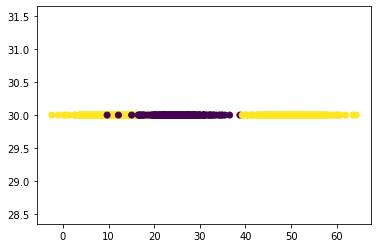

In [45]:
from sklearn.decomposition import PCA

def data_generator_4():

  mu = [10,25,50]
  sigma = [5,5,5]
  size = 200
  X = np.array([])
  Y = np.array([])

  assert len(mu) == len(sigma)


  for i in range(len(mu)):
    X = np.append(X,np.random.normal(mu[i], sigma[i], size))
    Y = np.append(Y,np.array([1 if i%2 == 0 else -1] * size))
  
  return (X,Y)

data_4 = data_generator_4()
plt.scatter(data_4[0],np.zeros_like(data_4[0]) + 30,c=data_4[1])

data_t = np.power(data_4[0],3)
data_final = np.vstack((data_4[0],data_t)).T
X_train, X_test, y_train, y_test = train_test_split(data_final, data_4[1], test_size=0.33, random_state=42)

pca = PCA(n_components=2)
pca.fit(X_train)

df_1 = pca.transform(X_train)

df_2 = pca.transform(X_test)

s_time = time.time()
svm_wrapped = svm_wrapper()
svm_wrapped.fit_svm(df_1,y_train,kernel='linear')
e_time = time.time()
print("Accuarcy : ",svm_wrapped.calculate_accuracy(df_2,y_test))

print('time',e_time - s_time)

s_time = time.time()
svm_wrapped = svm_wrapper()
svm_wrapped.fit_svm(X_train[:,0].reshape(-1,1),y_train,kernel='linear')
e_time = time.time()
print("Accuarcy : ",svm_wrapped.calculate_accuracy(X_test[:,0].reshape(-1,1),y_test))

print('time',e_time - s_time)


In [46]:
df_dict = {}
df_dict['dataset'] = 'simple data'
df_dict['pca_kernel'] = 'polynomial'
df_dict['svm_kernel'] = 'linear'
df_dict['polynomial'] = 3
df_dict['sigma'] = None
df_dict['small_k'] = None
df_dict['theta'] = None
df_dict['number principal components'] = 2
df_dict['Variance Explained'] = 0.999
df_dict['Accuracy With PCA'] = 0.9595959595959596
df_dict['Accuracy Without PCA'] = 0.6919191919191919
df_dict['elapsed time Increase'] = 32.42016649246216 / 0.5329093933105469

df = df.append(df_dict,ignore_index = True)

In [47]:
df

,dataset,pca_kernel,svm_kernel,polynomial,sigma,small_k,theta,number principal components,Variance Explained,Accuracy With PCA,Accuracy Without PCA,elapsed time Increase
0,periodic,polynomial,poly,0.2,None,None,NaN,3,0.990,0.518182,0.778788,3275.447402
1,periodic,rbf,rbf,None,0.008,None,NaN,662,0.990,0.481818,0.800000,233462.684461
2,periodic,sigmoid,sigmoid,None,None,1,0.5,12,0.990,0.518182,0.418182,985.041998
3,taichi,polynomial,poly,2,None,None,None,14,0.990,0.515152,0.815152,1928.664948
4,taichi,rbf,rbf,None,0.01,None,None,663,0.990,0.515152,0.866667,215343.228645
5,taichi,sigmoid,sigmoid,None,None,1,0.1,10,0.990,0.515152,0.709091,1713.779543
6,string,sigmoid,sigmoid,None,None,1,0.1,4,0.990,0.533333,0.572727,986.034268
7,string,rbf,rbf,None,0.01,None,None,662,0.990,0.533333,0.581818,147971.935429
8,string,polynomial,poly,2,None,None,None,4,0.990,0.533333,0.624242,1468.671546
9,simple data,polynomial,linear,3,None,None,None,2,0.999,0.959596,0.691919,60.836170
